# COGS 108 - Examining the Change in Prices of Used Cars vs. Public Transportation Spending

Video: https://youtu.be/LfMDAI59bgM

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [_X_] YES - make available
* [  ] NO - keep private

# Overview

The average American spends about 16% of their total budget on transportation. With transportation being such a significant cost in our daily lives, it is very important to take into consideration the different transportation options, whether it is public or private. The goal of our project is to figure out whether changes in US public transportation spending affect average used car prices in different brands. Our results show that there is quite a strong negative correlation between luxury car brand prices and public transportation spending. 

# Names

- Alex Kuang
- Lucas Papaioannou
- Ryan Harsono
- Bailey Ho
- Michael Maytesyan

<a id='research_question'></a>
# Research Question

How do changes in US transportation spending affect average prices between various car brands per year?

<a id='background'></a>

## Background & Prior Work

Our topic discusses the relationship between public transportation spending and used car prices. The U.S. government plays a vital role in the transportation system by providing transportation infrastructure and allocating funds to build, maintain, and operate the infrastructure system [^bureau]. The government expenditure on transportation has grown a decent amount year over year.

The average American spends about 16% of their total budget on transportation. Over the past two years, the average cost of a used vehicle has gone up more than 42% [^D'Allegro]. This leaves most people in a dilemma of picking which brand of used cars to purchase. We believe that most people who are looking to purchase a used car are likely looking for low prices. Hence, they would be looking at specific car brands that fit their budget. With this in mind, we are interested in seeing whether the change in US transportation spending will affect the average prices of certain car brands differently. 

Even though there is minimal research done on this relationship we found some research done in 2020 regarding the quality of public transportation and its relationship to car sales in Sweden. They used data from 21 Swedish counties from 1986 to 2015 and they concluded that there is an effect on car sales in relation to the level of service in public transportation [^Holmgren]. They introduced the idea of using car ownership as a way to measure the usage of public transportation and how the presence of this affects the benefits of investing in better public transportation.

[^bureau] Bureau of Transportation Statistics. (2021, December). Government Transportation Financial Statistics (GTFS). Government Transportation Financial Statistics (GTFS) | Bureau of Transportation Statistics. Retrieved October 24, 2022, from https://www.bts.gov/gtfs

[^D'Allegro] D'Allegro, J. (2022, April 9). Thinking about buying a car? here's what auto experts say you need to know. CNBC. Retrieved October 24, 2022, from https://www.cnbc.com/2022/04/09/thinking-about-buying-a-car-heres-what-experts-say-you-need-to-know.html

[^Holmgren] Holmgren, J. (2020, September 23). The effect of public transport quality on car ownership – a source of wider benefits? Research in Transportation Economics. Retrieved October 24, 2022, from https://www.sciencedirect.com/science/article/pii/S0739885920301554

# Hypothesis


When there is an increase in spending on public transportation, there will be a decrease in average car prices, but the luxury brands prices will not decrease as much as non-luxury brands. By increasing spending on public transportation, it will lead to fewer people purchasing used cars, leading to a decrease in the average price. We believe the decrease in prices would not be as significant in luxury car brands (brands with average prices above $40,000) because people who are in the market for luxury cars are not likely to be comparing those prices to the cost of public transportation. 

# Dataset(s)

**Dataset 1**
- Dataset Name: US Used cars dataset
- Link to the dataset: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset
- Number of observations: 3000000
- Description: This dataset contains details of 3 million used cars in the United States. For each car (row), it contains details like body type and fuel economy.

**Dataset 2**
- Dataset Name: FTA Allocations for Formula and Discretionary Programs by State FY 1998-2022 Full Year
- Link to the dataset: https://www.transit.dot.gov/funding/grants/fta-allocations-formula-and-discretionary-programs-state-fy-1998-2022-full-year
- Number of observations: 55
- Description: This dataset contains data of how much was allocated for each state, for each year from 1998 to 2022. Each column contains how much in dollars was allocated for what (ex: Metropolitan Planning, Transit Oriented Development) in each state.

We plan to use Dataset 2 to see if there is a relationship between the % change in spending to the % change in prices for different brands of cars.

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cardf = pd.read_csv(r'.\used_cars_data.csv', low_memory = True)
budgets = pd.read_csv(r'.\budgets.csv')

C:\Users\omicr\AppData\Local\Temp\ipykernel_17904\307603370.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cardf = pd.read_csv(r'.\used_cars_data.csv', low_memory = True)


# Data Cleaning

To begin, we first checked how much of each of the columns in our dataset had missing data, which is indicated by NaN or NA. We found that the column labeled "franchise_make", representing the different brands of vehicles, was missing data in approximately 19% of its rows, comprising a significant portion of the column data. Because one of our variables of interest in our research question is the brand of vehicles being sold, we dropped rows that have missing data in the "franchise_make" column.

In [174]:
# There are many columns currently in this dataset that we do not need. 
# To answer our research question and preform analysis we only need 
# 'price', 'franchise_make', 'body_type', 'is_new', 'year', and 'listed_date'
cardf.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [175]:
# Since we do not need all the columns of this df we just create another df that contains the columns we need.
needed_cols = ['price', 'franchise_make', 'body_type', 'is_new', 'year','listed_date']
smaller_cardf = cardf[needed_cols]

# checking how much of each column is NaN or NA
print(smaller_cardf.isna().mean())
# We can see that the "franchise_make" column has a sizeable percentage of missing data, around 19%. 
# Since we are interested in "franchise_make" for our research question we have to drop columns that have a missing franchise_make
smaller_cardf = smaller_cardf[smaller_cardf.notna()['franchise_make']]

price             0.000000
franchise_make    0.190876
body_type         0.004514
is_new            0.000000
year              0.000000
listed_date       0.000000
dtype: float64


In [176]:
# Here is our final dataframe, with only the relevant columns that we want to retain. 
# Unnecessary information has been cut out as we are only interested in the types of cars, 
# when they were listed, whether the model year newer than 2 years., the make, and the price.

smaller_cardf

,price,franchise_make,body_type,is_new,year,listed_date
0,23141.0,Jeep,SUV / Crossover,True,2019,2019-04-06
1,46500.0,Land Rover,SUV / Crossover,True,2020,2020-02-15
2,46995.0,FIAT,Sedan,False,2016,2017-04-25
3,67430.0,Land Rover,SUV / Crossover,True,2020,2020-02-26
4,48880.0,Land Rover,SUV / Crossover,True,2020,2020-04-25
...,...,...,...,...,...,...
3000032,22901.0,Nissan,Van,True,2020,2020-07-12
3000034,40993.0,Ford,Pickup Truck,False,2017,2020-06-15
3000036,36490.0,Chevrolet,SUV / Crossover,True,2020,2020-03-25
3000037,12990.0,Jeep,Sedan,False,2016,2020-06-13


In [177]:
# We need to clean up the budgets df as the total money spent is in a string format not a float
budgets = pd.read_csv(r'.\budgets.csv')
budgets['2018'] = budgets['2018'].apply(lambda x : float(x.replace(',','')))
budgets['2019'] = budgets['2019'].apply(lambda x : float(x.replace(',','')))
budgets['2020'] = budgets['2020'].apply(lambda x : float(x.replace(',','')))

# As seen below the types of the 2018, 2019, 2020 columns have been fixed
budgets

,State,2018,2019,2020
0,Alabama,6.407370e+07,6.217764e+07,7.802033e+07
1,Alaska,6.556634e+07,6.051608e+07,8.120109e+07
2,American Samoa,1.346626e+06,4.366966e+06,5.007090e+06
3,Arizona,1.579521e+08,2.320779e+08,3.149065e+08
4,Arkansas,3.837230e+07,3.664334e+07,3.726260e+07
5,California,2.798549e+09,2.070358e+09,2.112913e+09
6,Colorado,2.113750e+08,1.346584e+08,1.693795e+08
7,Connecticut,1.965856e+08,1.898076e+08,1.982542e+08
8,Delaware,3.155726e+07,3.158561e+07,3.205990e+07
9,District of Columbia,2.228053e+08,2.132218e+08,2.198998e+08


# Data Analysis & Results

Explanations of EDA and graphs are below each section that contains a graph.

Text(0.5, 1.0, 'Figure 1: Number of Sales Per Brand vs. Number of Brands (2018-2020)')

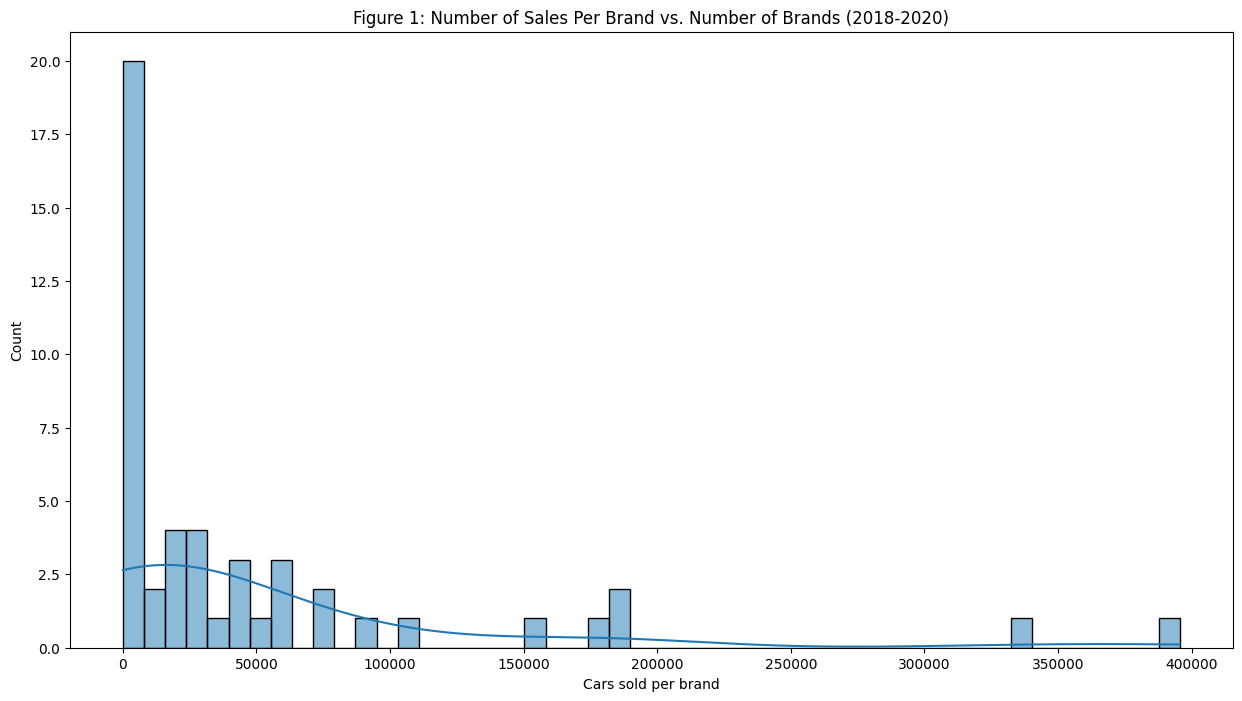

In [178]:
f1, ax = plt.subplots(figsize=(15,8))
sales_by_brand = smaller_cardf['franchise_make'].value_counts()
sns.histplot(x = sales_by_brand, kde = True, bins = 50)
plt.xlabel("Cars sold per brand")
plt.title("Figure 1: Number of Sales Per Brand vs. Number of Brands (2018-2020)")

We first used a countplot to portray the number of sales from each brand, from 2018-2020. We set the x-axis to the number of sales of each brand and made the y-axis the number of brands. After viewing the graph, it became clear that it was not easily comprehensible as it portrayed multiple brands in one bar, making it difficult to discern the approximate number of sales for each brand. For example, the first bar shows that there are 20 brands that have sales within the 0-10,000 range, but we were not also able to determine which brands sold a small number of cars. Since this was not specific enough for us to determine outliers brands, we plot the exact number of sales per brand.

Text(0.5, 1.0, 'Figure 2: Number of Sales Per Brand (2018-2020)')

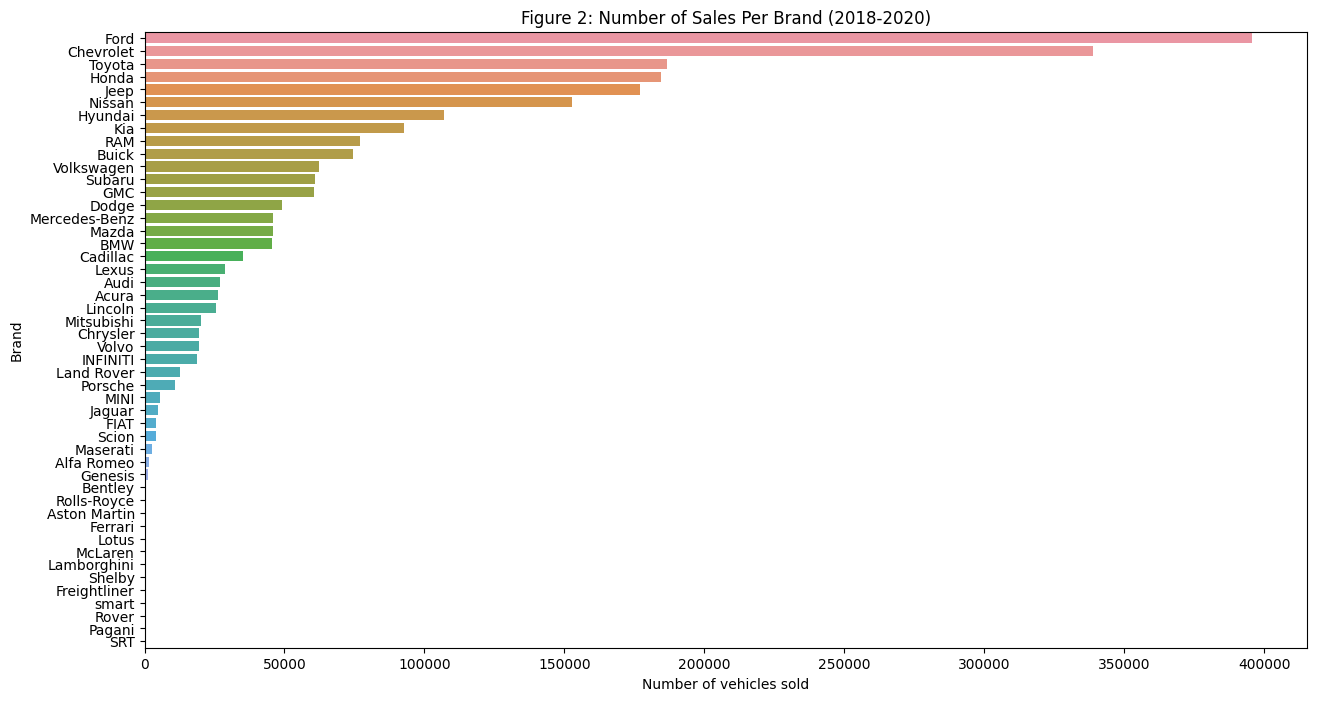

In [179]:
f2, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = sales_by_brand.index, x = sales_by_brand.values)
plt.ylabel('Brand')
plt.xlabel('Number of vehicles sold')
plt.title("Figure 2: Number of Sales Per Brand (2018-2020)")

As conveyed by the graph above, we made the x-axis the number of sales for each brand, with the y-axis detailing the specific brands, from 2018-2020. This allowed us to see each brand’s sales separately. All the brands below Genesis on the y-axis have sales below 1,000 cars over the course of these three years. We will be removing those 13 brands (Bentley, Rolls-Royce, Aston Martin, Ferrari, Lotus, McLaren, Lamborghini, Shelby, Freightliner, Smart, Rover, Pagani, SRT) from our dataset since they are outliers, having sold too few cars to be relevant to our research question.

Text(0.5, 1.0, 'Figure 3: Median Car Price Per Brand (2018-2020)')

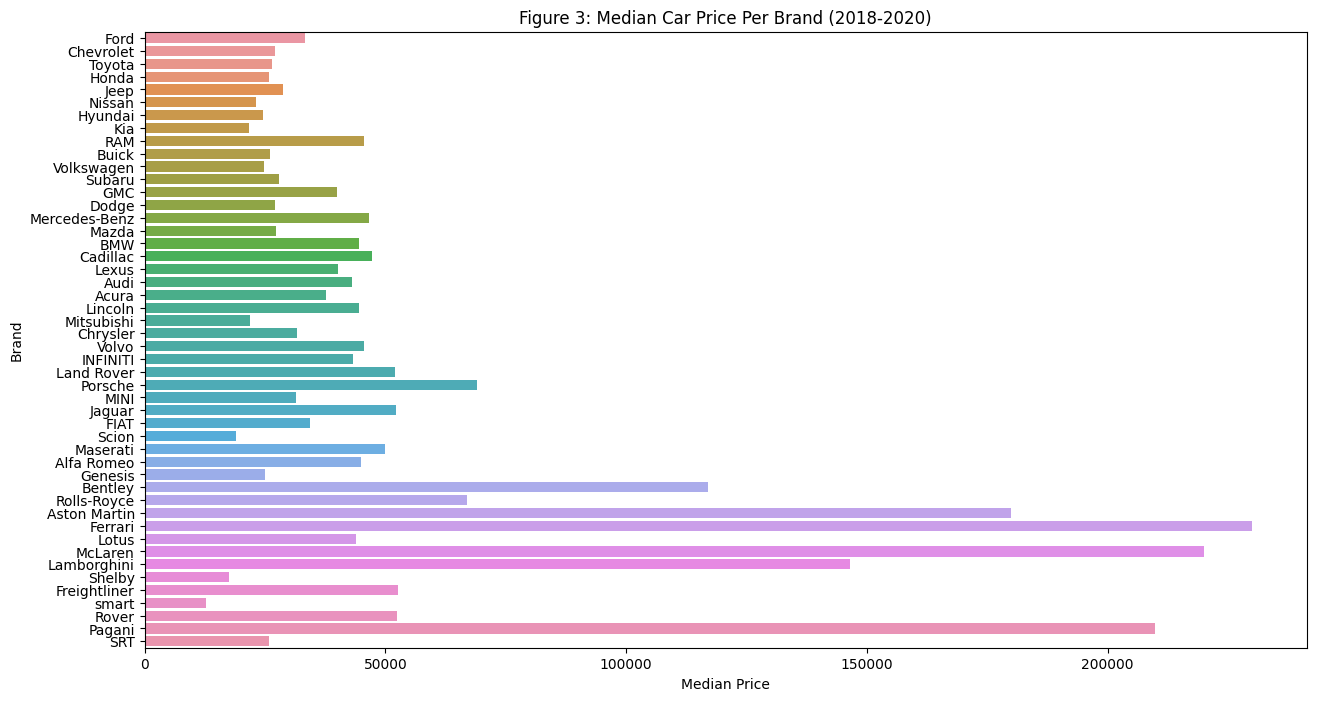

In [180]:
f3, ax = plt.subplots(figsize=(15,8))
median_price_brand = smaller_cardf.groupby('franchise_make')['price'].median().sort_values(ascending = False)
sns.barplot(y = median_price_brand.index, x = median_price_brand.values, order = sales_by_brand.index)
plt.xlabel('Median Price')
plt.ylabel('Brand')
plt.title("Figure 3: Median Car Price Per Brand (2018-2020)")

Additionally, we wanted to test if there was a relationship between the prices of the outliers and the number of sales in order to validate our decision to classify brands with a low number of sales as outliers and remove them from our data. To do this, we created the chart above, which shows the median prices of each brand. From our graph, we can see that the brands we chose to remove tended to have extreme median prices, being either extremely expensive or inexpensive, which supports our theory of the brands being outliers. We used the median to account for any outliers in the data, with the outliers being removed in the graphs below.

In [181]:
needed_brands = sales_by_brand[sales_by_brand > 1000].index.tolist()

filtered_cardf = smaller_cardf[smaller_cardf['franchise_make'].isin(needed_brands)]

Text(0.5, 1.0, 'Figure 4: Number of Sales Per Brand (2018-2020, Outliers Removed)')

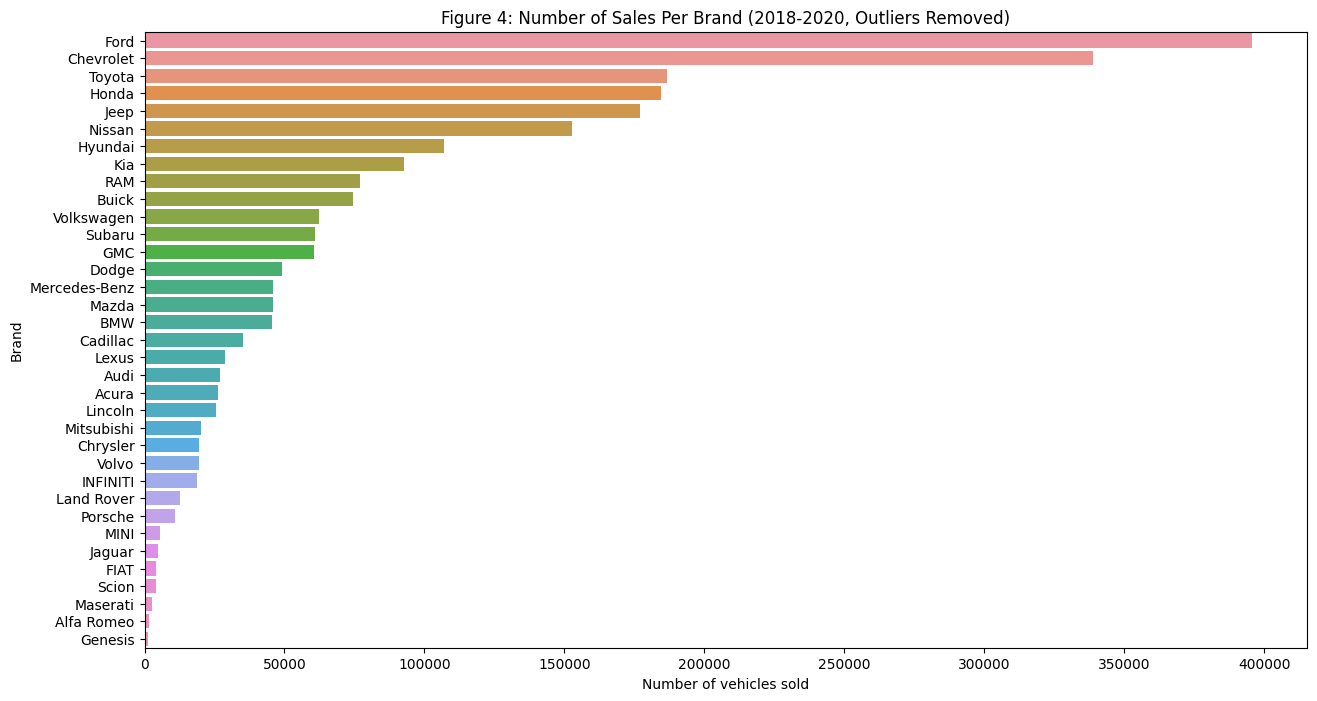

In [182]:
f4, ax = plt.subplots(figsize=(15,8))
filtered_sales_by_brand = filtered_cardf['franchise_make'].value_counts()
sns.barplot(y = filtered_sales_by_brand.index, x = filtered_sales_by_brand.values)
plt.ylabel('Brand')
plt.xlabel('Number of vehicles sold')
plt.title('Figure 4: Number of Sales Per Brand (2018-2020, Outliers Removed)')

The graph above is the resulting revision of Figure 2 after removing the 13 brands that we determined were outliers.

Text(0.5, 1.0, 'Figure 5: Median Car Price Per Brand (2018-2020, Outliers Removed)')

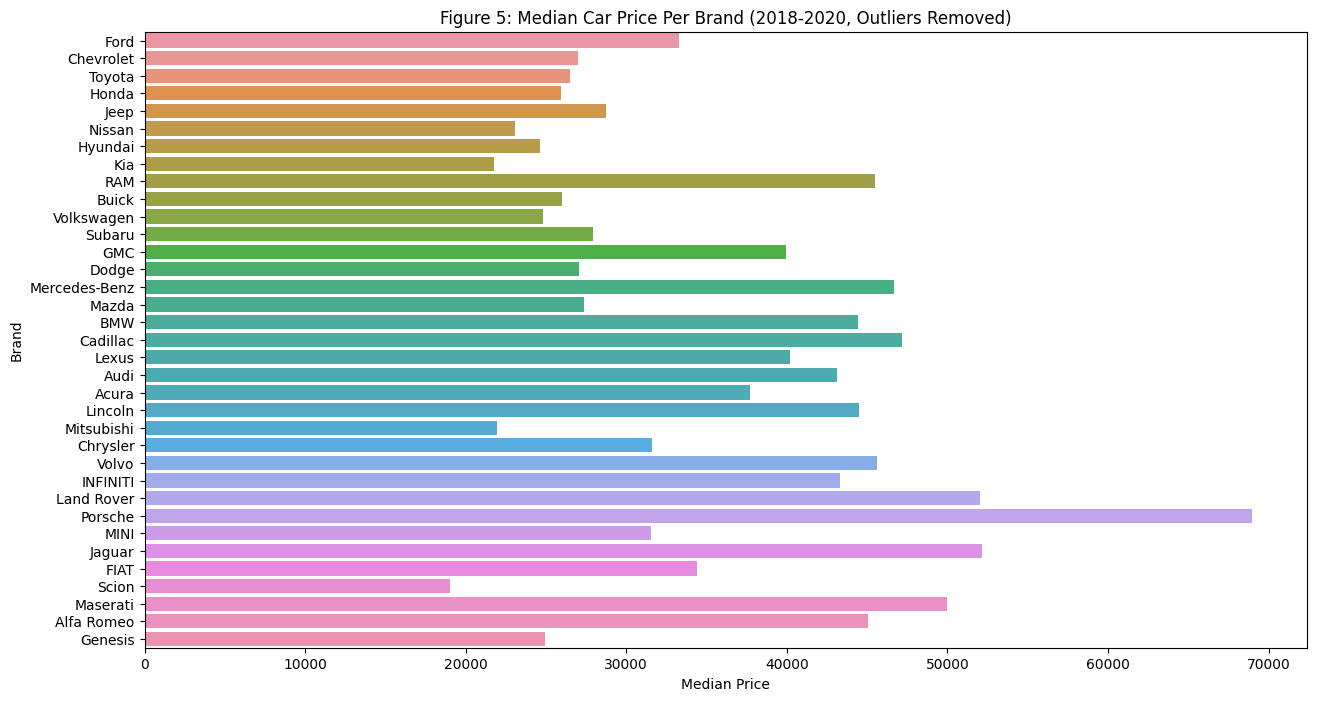

In [183]:
f5, ax = plt.subplots(figsize=(15,8))
filtered_median_price_brand = filtered_cardf.groupby('franchise_make')['price'].median().sort_values(ascending = False)
sns.barplot(y = filtered_median_price_brand.index, x = filtered_median_price_brand.values, order = filtered_sales_by_brand.index)
plt.xlabel('Median Price')
plt.ylabel('Brand')
plt.title('Figure 5: Median Car Price Per Brand (2018-2020, Outliers Removed)')

The graph above is the resulting revision of Figure 3 after removing the 13 brands that we determined were outliers.

In [184]:
# Make the "State" column the index of the budgets df so we can simplify it
budgets = budgets.set_index("State")
budgets

,2018,2019,2020
State,,,
Alabama,6.407370e+07,6.217764e+07,7.802033e+07
Alaska,6.556634e+07,6.051608e+07,8.120109e+07
American Samoa,1.346626e+06,4.366966e+06,5.007090e+06
Arizona,1.579521e+08,2.320779e+08,3.149065e+08
Arkansas,3.837230e+07,3.664334e+07,3.726260e+07
California,2.798549e+09,2.070358e+09,2.112913e+09
Colorado,2.113750e+08,1.346584e+08,1.693795e+08
Connecticut,1.965856e+08,1.898076e+08,1.982542e+08
Delaware,3.155726e+07,3.158561e+07,3.205990e+07


In the above code, we made the state column the index so we would be able to aggregate the budget dataframe by state. The columns represent the years and each row has 3 entries representing the amount of money the FTA spent on each state in 2018, 2019, 2020.

Text(0.5, 1.0, 'Figure 6: Federal U.S. Transportation Spending Per Year (2018-2020)')

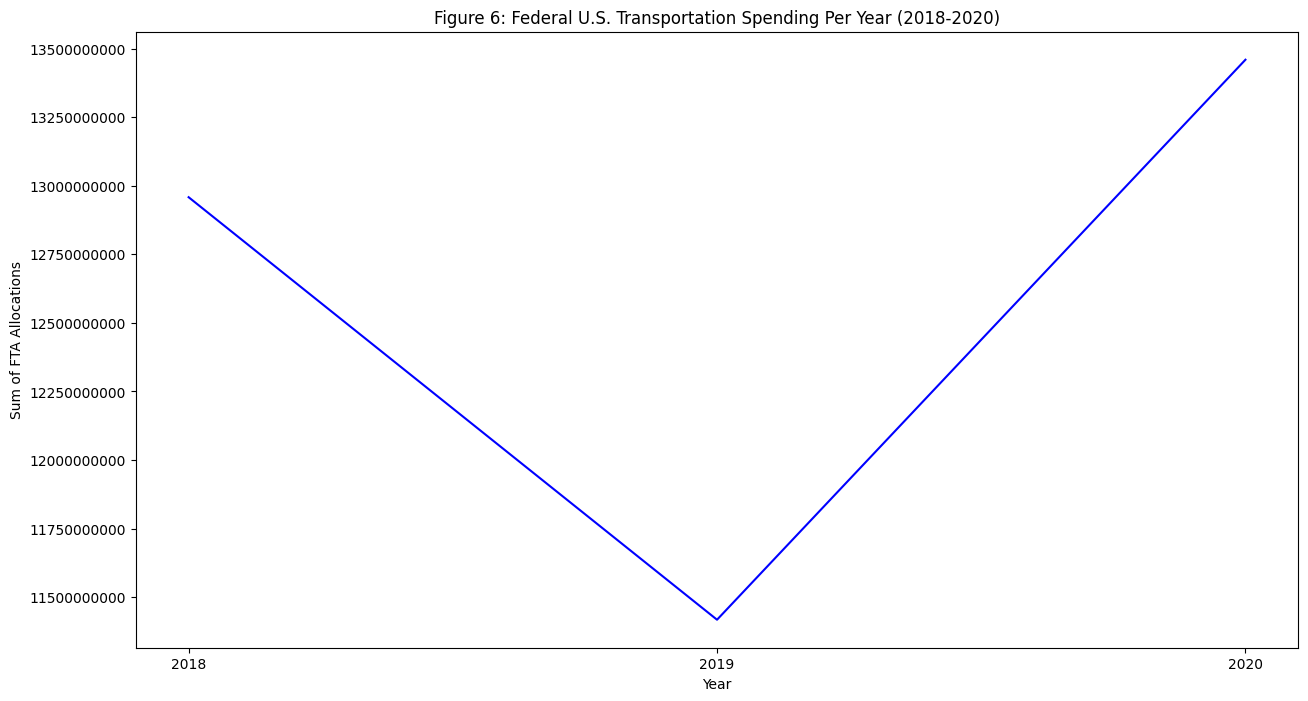

In [185]:
f6, ax = plt.subplots(figsize=(15,8))
total_budget_by_year = budgets.sum(axis=0)

sns.lineplot(total_budget_by_year, color = 'blue')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Sum of FTA Allocations')
plt.title('Figure 6: Federal U.S. Transportation Spending Per Year (2018-2020)')

Next, we plotted the values of the transportation budget spending from 2018-2020 as a line graph, as shown above. We can see that spending plummeted from 2018 to 2019, but then picked back up and exceeded the original spending in 2020.

In [186]:
# Make a column 'listed_year' based on the 'listed_date' column
filtered_cardf['listed_year'] = filtered_cardf['listed_date'].apply(lambda x : int(x.split('-')[0]))

C:\Users\omicr\AppData\Local\Temp\ipykernel_17904\2049843467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cardf['listed_year'] = filtered_cardf['listed_date'].apply(lambda x : int(x.split('-')[0]))


In [187]:
filtered_cardf['listed_year'].value_counts()

2020    2248500
2019     168363
2018       6363
2017        743
2016        191
2015        152
2014         11
2013          7
2010          2
2012          1
2011          1
Name: listed_year, dtype: int64

Text(0.5, 1.0, 'Figure 7: Average Car Price Per Year (2018-2020)')

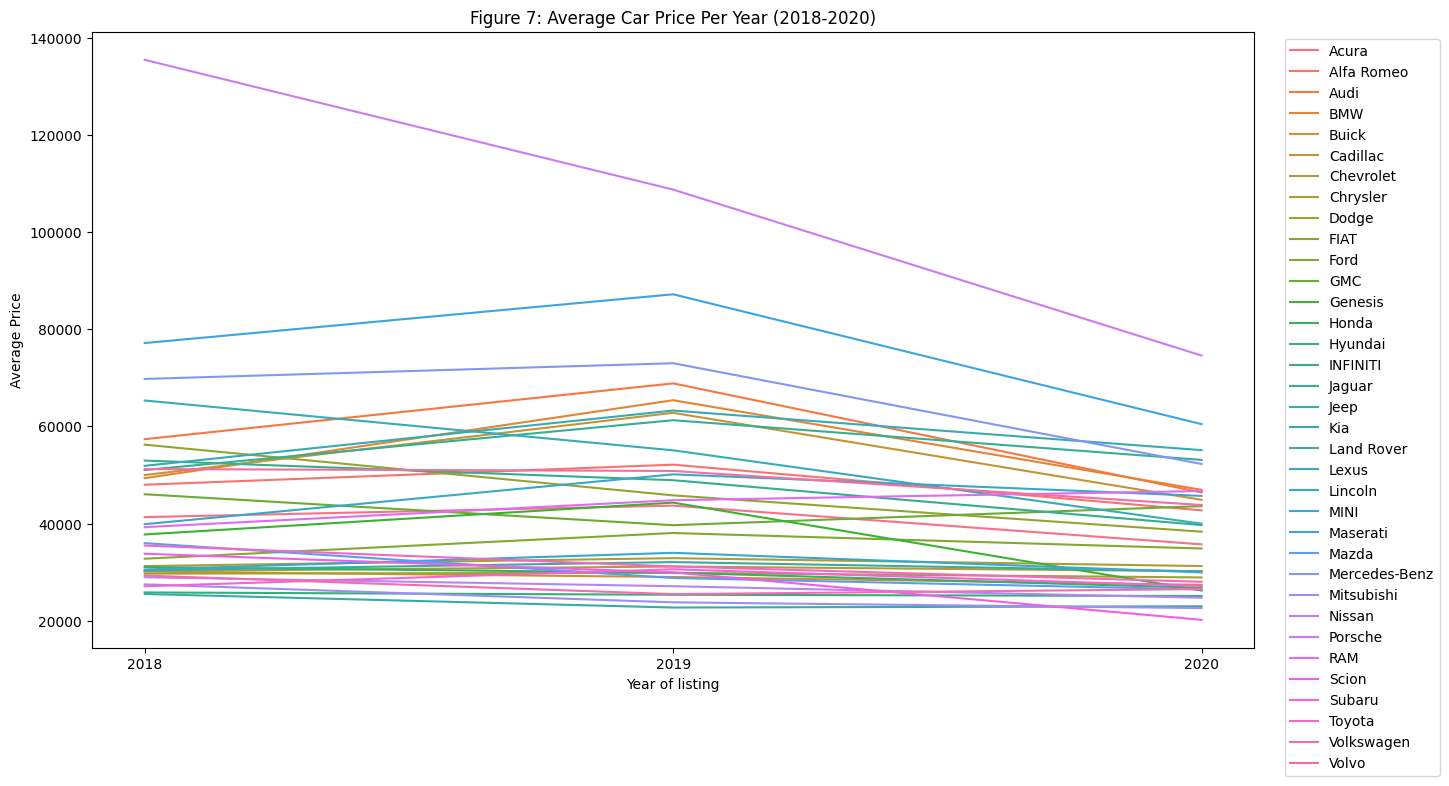

In [15]:
# need to filter based on 'listed_year' columns since there are lsitings from before 2018

f7, ax = plt.subplots(figsize=(15,8))

filtered_cardf = filtered_cardf[filtered_cardf['listed_year'] > 2017]

brand_sales_by_year = filtered_cardf.groupby(['franchise_make','listed_year'])['price'].mean().rename('average_price')

brand_sales_by_year = pd.DataFrame(brand_sales_by_year)

sns.lineplot(data = brand_sales_by_year, x = 'listed_year', y = 'average_price', hue = 'franchise_make')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticks([2018, 2019, 2020])
plt.xlabel('Year of listing')
plt.ylabel('Average Price')
plt.title("Figure 7: Average Car Price Per Year (2018-2020)")

Next, we plotted the values of the average prices by brand from 2018-2020 as a line graph, as shown above. We can see that with all the data together like this it is hard to differentiate the change in price between brands.

In [16]:
percent_change_budgets = (budgets.sum(axis=0).pct_change()*100).drop('2018').rename('budget_change')
percent_change_budgets

2019   -11.886743
2020    17.879974
Name: budget_change, dtype: float64

In [17]:
change_brand_sales = brand_sales_by_year.unstack().pct_change(axis=1)*100
change_brand_sales.columns = change_brand_sales.columns.droplevel()
change_brand_sales = change_brand_sales.drop(2018, axis=1)
change_brand_sales = change_brand_sales.rename({2019:'2018-2019',2020:'2019-2020'}, axis= 'columns')

Text(0.5, 1.0, 'Figure 8: Percent Change in Average Car Price Per Brand (2018-2019)')

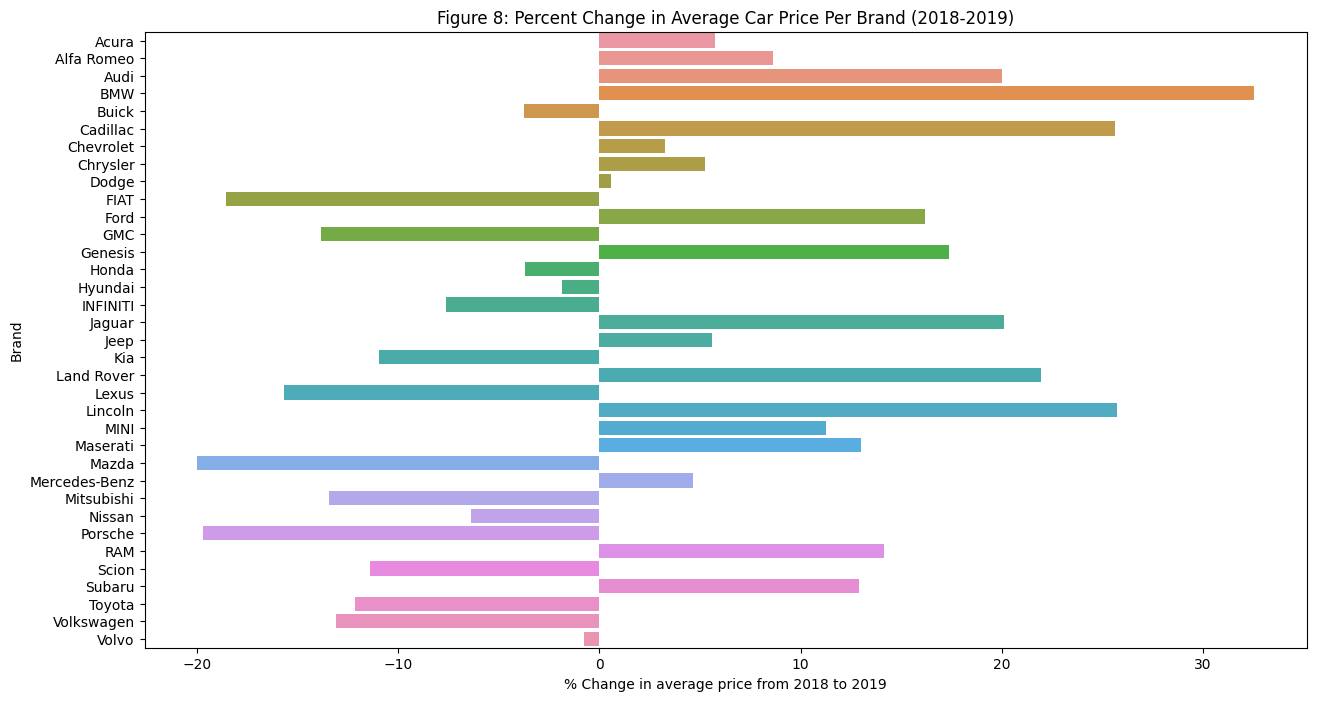

In [18]:
change_brand_sales
f8, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = change_brand_sales.index, x = change_brand_sales['2018-2019'])
plt.xlabel('% Change in average price from 2018 to 2019')
plt.ylabel('Brand')
plt.title('Figure 8: Percent Change in Average Car Price Per Brand (2018-2019)')

To better visualize the data in a way where we can answer our research question, we took all the average car prices from 2018-2020 and calculated their average percent change year over year. This way we can easily see the price change from 2018-2019 and 2019-2020 to better relate the information to the change in transportation spending.

The chart above displays the percentage change in the average price of a car per car brand. At a glance, it appears that approximately half of the car brands examined saw an increase in the average price of their cars, while approximately half saw a decrease in their average price. BMW had the largest percentage increase in price while Mazda had the largest percentage decrease.

Text(0.5, 1.0, 'Figure 9: Percent Change in Average Car Price Per Brand (2019-2020)')

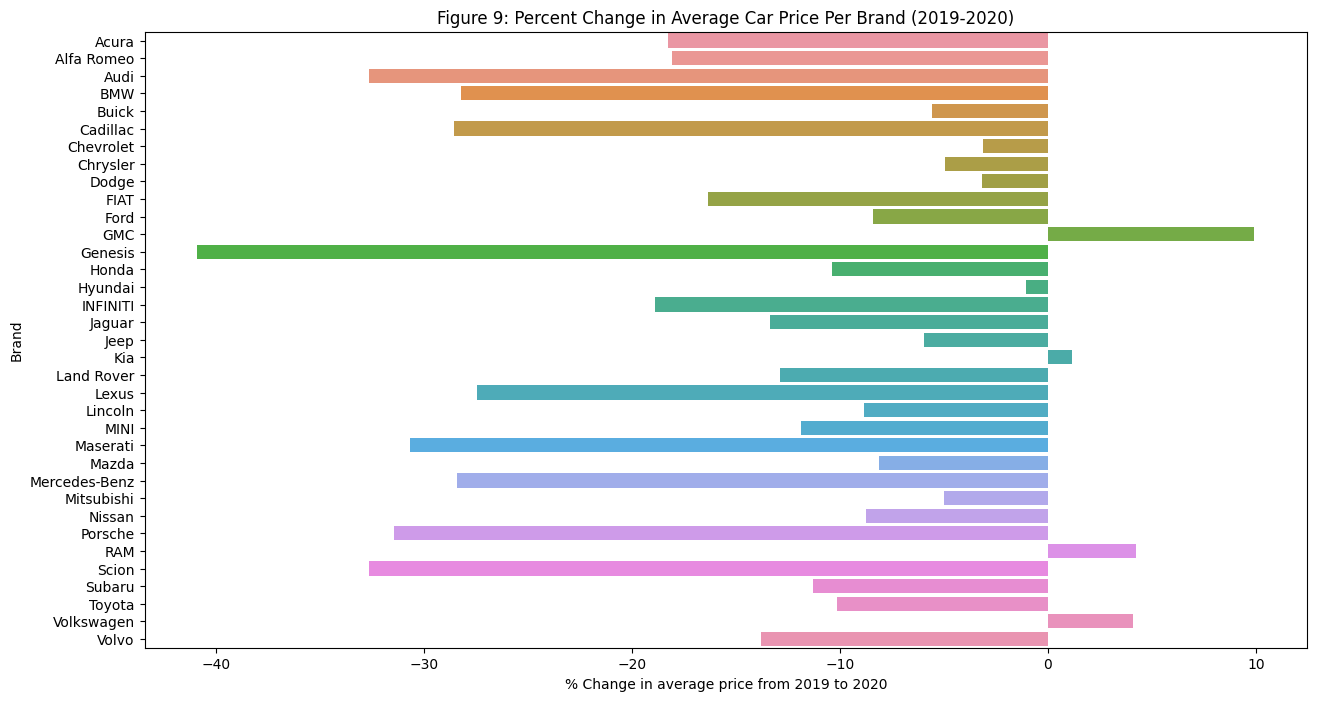

In [19]:
change_brand_sales
f9, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = change_brand_sales.index, x = change_brand_sales['2019-2020'])
plt.xlabel('% Change in average price from 2019 to 2020')
plt.ylabel('Brand')
plt.title('Figure 9: Percent Change in Average Car Price Per Brand (2019-2020)')

This chart shows the percent change in average prices in 2019-2020. As we can see, many car brands had their average prices drop (Genesis had the largest percentage decrease with about a 40% decrease), while a few went up (GMC had the largest percentage increase with a 10% increase). A possible explanation for this trend is due to the COVID-19 pandemic.

In [59]:
filtered_mean_price_brand = filtered_cardf.groupby('franchise_make')['price'].mean().sort_values(ascending = False)
filtered_mean_price_brand

franchise_make
Porsche          77008.020292
Maserati         62388.214644
Land Rover       56499.642578
Jaguar           55267.000203
Mercedes-Benz    54695.566765
BMW              48341.493462
Audi             47274.366898
Cadillac         47131.189312
RAM              46483.104002
Lincoln          46191.005135
Volvo            44730.335799
GMC              43332.854200
Alfa Romeo       43079.140351
INFINITI         40931.098318
Lexus            40553.509967
FIAT             39020.170198
Acura            36112.871038
Ford             35150.925694
Chrysler         31426.397533
MINI             30472.473931
Jeep             30317.974033
Chevrolet        30245.086070
Dodge            28950.541344
Toyota           28078.804591
Genesis          27610.187890
Buick            27507.324035
Subaru           27189.109687
Honda            26888.112376
Mazda            26532.852457
Volkswagen       26467.627405
Hyundai          25093.037841
Nissan           24912.519031
Kia              22957.78

In the above code, we calculated the average prices of all the brands over the entire dataset and sorted them from highest to lowest. For the purposes of this study a luxury car brand is a brand whose average price is equal to or above $40,000.

In [58]:
lux = filtered_mean_price_brand[filtered_median_price_brand >= 40000].index
print("FTA budget decreased from 2018 to 2019")
change_lux_brand_sales = change_brand_sales['2018-2019'][change_brand_sales.index.isin(lux)]
change_nonlux_brand_sales = change_brand_sales['2018-2019'][~(change_brand_sales.index.isin(lux))]
print('Average % change in luxury brands from 2018 to 2019:', change_lux_brand_sales.mean())
print('Average % change in non-luxury brands from 2018 to 2019:',change_nonlux_brand_sales.mean())
print()

print("FTA budget increased from 2019 to 2020")
change_lux_brand_sales = change_brand_sales['2019-2020'][change_brand_sales.index.isin(lux)]
change_nonlux_brand_sales = change_brand_sales['2019-2020'][~(change_brand_sales.index.isin(lux))]
print('Average % change in luxury brands from 2019 to 2020:', change_lux_brand_sales.mean())
print('Average % change in non-luxury brands from 2019 to 2020:',change_nonlux_brand_sales.mean())



FTA budget decreased from 2018 to 2019
Average % change in luxury brands from 2018 to 2019: 10.180926109955719
Average % change in non-luxury brands from 2018 to 2019: -2.429039681579265

FTA budget increased from 2019 to 2020
Average % change in luxury brands from 2019 to 2020: -20.639105072500236
Average % change in non-luxury brands from 2019 to 2020: -9.08234757600517


In the above code we extracted the names of the brands that meet the requirement of being a luxury car brand which is having an average price equal to or above $40,000. We then calculated the average % change in price from 2018 to 2019 and 2019 to 2020 for luxury brands and non-luxury brands. 

__From 2018-2019, the FTA budget decreased while the average price for luxury car brands increased by about 10\% and the average price for non-luxury brands decreased about by 2\%.__

__From 2019-2020, the FTA budget increased while the average price for luxury car brands decreased by about 21\% and the average price for non-luxury brands decreased about by 9\%.__


These results show that when the FTA budget decreased, luxury brand prices increased while non-luxury brands had a slight decrease. When the FTA budget increased, both luxury and non-luxury car prices dropped significantly with the former decreasing over two times as much.

Text(0.5, 1.0, 'Figure 10: Average Price of Luxury and Non-Luxury Cars Brands and Sum of FTA Allocations from 2018-2020')

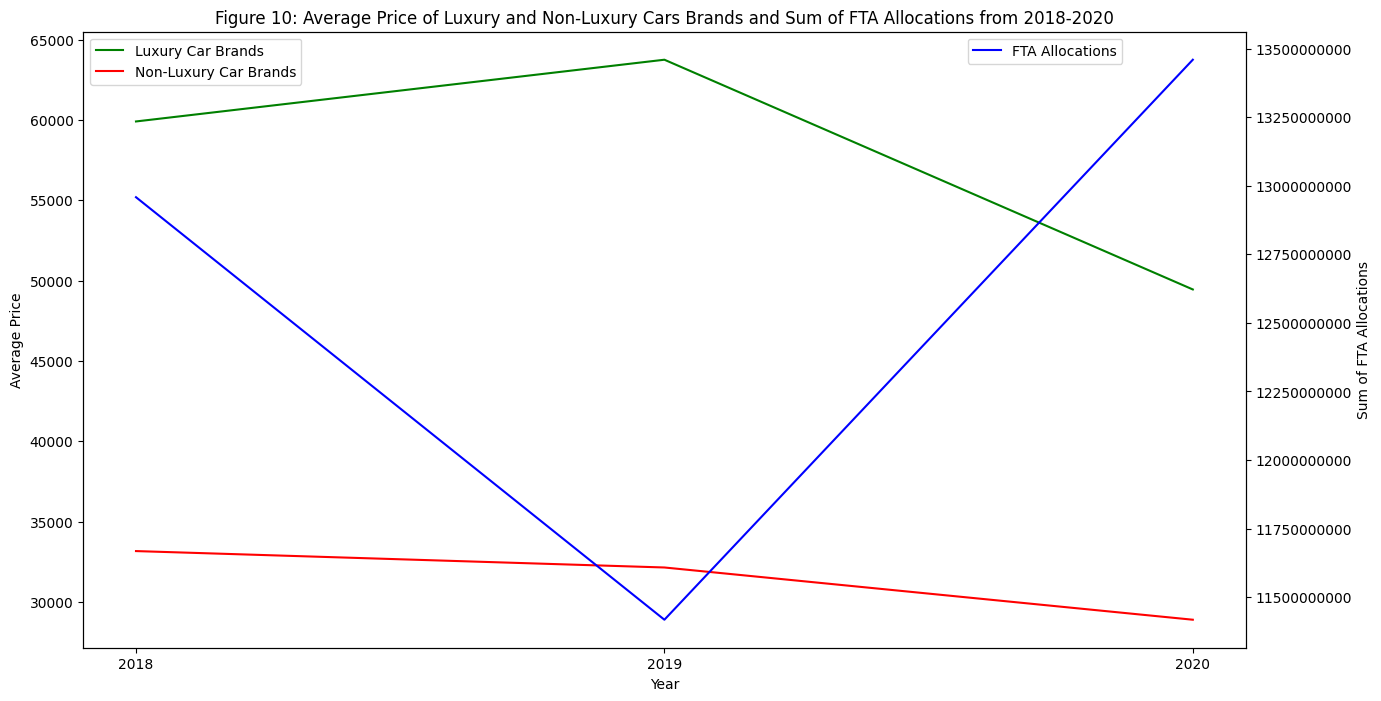

In [160]:
f10, ax = plt.subplots(figsize=(15,8))

lux_brand_sales_by_year = brand_sales_by_year.unstack()
lux_brand_sales_by_year = lux_brand_sales_by_year[lux_brand_sales_by_year.index.isin(lux)]
nonlux_brand_sales_by_year = brand_sales_by_year.unstack()
nonlux_brand_sales_by_year = nonlux_brand_sales_by_year[~nonlux_brand_sales_by_year.index.isin(lux)]

agg_lux_price = lux_brand_sales_by_year.mean()
agg_lux_price.index = [2018, 2019, 2020]
agg_nonlux_price = nonlux_brand_sales_by_year.mean()
agg_nonlux_price.index = [2018, 2019, 2020]

ax = sns.lineplot(agg_lux_price,label = 'Luxury Car Brands', color = 'green')
sns.lineplot(agg_nonlux_price,label = 'Non-Luxury Car Brands', color = 'red', ax = ax)

ax2 = ax.twinx()

total_budget_by_year.index = [2018, 2019, 2020]

sns.lineplot(total_budget_by_year, ax = ax2, color = 'blue',label = 'FTA Allocations')
ax.set_xticks([2018, 2019, 2020])
ax.legend(loc = 'upper left')
ax2.legend(bbox_to_anchor=(.9, 1), loc = 'upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax2.set_ylabel('Sum of FTA Allocations')
ax2.ticklabel_format(style='plain', axis='y')
plt.title('Figure 10: Average Price of Luxury and Non-Luxury Cars Brands and Sum of FTA Allocations from 2018-2020')

The chart above visualizes the relationship between luxury and non-luxury car brands with the FTA allocations from 2018-2020. It is quite clear that there is some sort of negative correlation between the type of car brand and FTA allocation. We continue to calculate the exact r value of both.

In [168]:
print('Correlation between Average Luxury Car Brand Price and Sum of FTA Allocations:')
print(np.corrcoef(agg_lux_price, total_budget_by_year)[0,1])
print('Correlation between Average Non-Luxury Car Brand Price and Sum of FTA Allocations:')
print(np.corrcoef(agg_nonlux_price, total_budget_by_year)[0,1])

Correlation between Average Luxury Car Brand Price and Sum of FTA Allocations:
-0.8541956298462204
Correlation between Average Non-Luxury Car Brand Price and Sum of FTA Allocations:
-0.5059870233727148


For the Average Luxury Car Brand Price and Sum of FTA Allocations, the correlation came out to be roughly r = -0.85, which is indicative of an extremely strong negative correlation. For the Average Non-Luxury Car Brand Price and Sum of FTA Allocations, the correlation was around -0.5, which is not as strong but still somewhat substantial. 

# Ethics & Privacy

In terms of the ethics and privacy of the collection methods of our data, we believe that our chosen datasets are unbiased and free from privacy concerns due to them being publicly available. The dataset we use to obtain information about the availability of used cars, which is openly accessible from the data science and machine learning platform Kaggle, was directly sourced from CarGurus, a vehicle marketplace website. CarGurus’ terms and conditions ensure that users who submit their vehicles’ information to CarGurus are made aware that their disclosed vehicle information, such as identifying features of each particular car, will be publicly visible. None of the user's personal data are included. Additionally, the dataset we use for each state's annual allocation from the Federal Transit Administration is transparently published on the U.S. Department of Transportation’s website for the public to view. 

One limitation imposed by the dataset based on the CarGurus listings is the reality that there is a multitude of different online vehicle marketplace platforms, meaning that our used cars database does not completely encompass the nationwide used car market. However, we believe that the dataset we use is able to represent and generalize the broad market moderately well due to the fact that CarGurus as a company is publicly listed on the New York Stock Exchange, signifying that it is a top competitor and well-known in the used car industry.

Another limitation of our used cars dataset is the effect of inflation and both macroeconomic and microeconomic variables, as such will naturally influence the decision of people to purchase used cars. Sensibly, people’s decisions to purchase used cars will determine the prices of used cars. Macroeconomic variables may include the fluctuation of nationwide gas prices and overall market sentiment, while a microeconomic variable might be the variability of population density between cities since population density could be used as a measure of the difficulty of local traffic. All of these economic concerns, nevertheless, can be addressed by the fact that we examine both public transit spending and the prices of used cars on a national level. Because we view our data from a national perspective, inflation and macroeconomic variables will affect both public transit spending and the prices of used cars on a similar scale, while we can expect the effect of microeconomic variables to average out between the various types and sizes of U.S. cities. 


# Conclusion & Discussion

In our research project, we attempted to find a correlation between US transportation budget changes and the prices of luxury and non-luxury car brands. We began by finding datasets for both the US transportation budget and used car sales in the USA. The dataset we found contained a lot of extra information that was not relevant to our question, so we spent a lot of time cleaning the dataset. After cleaning, the information that remained was the cars’ brands, the sale prices, and the date of sale. 
 
Once our data was cleaned, we began our descriptive analysis by visualizing the data into charts. By visualizing the data in charts, we were able to figure out the outliers and easily remove them. Once we had clear charts of the FTA spending (Figure 6) and average car prices by brand (Figure 7), we were more easily able to see a possible correlation between the two variables. We continued to explore deeper into the data by separating Figure 7 into two charts (Figures 8 and 9). These two charts showed the percent change in the average price of each car brand from 2018-2019 and 2019-2020, respectively. Both those charts made it much easier to begin our inferential analysis of the data because we could clearly see if the car prices were trending down or up for that year and could create a correlation between all the variables. 
 
We hypothesized that an increase in FTA spending would lead to a decrease in the average prices of all car brands, but luxury car brands would decrease less. After completing our analysis, we have not found definitive support for our hypothesis. We did find a negative correlation between both luxury and non-luxury cars and FTA spending though, but there was a stronger correlation for the luxury cars than the non-luxury ones. Even though our hypothesis was not completely correct, through our analysis, we were able to formulate an answer for our research question. The main objective of our research was to see if changes in FTA spending affect any specific car brands specifically. Through our correlational analysis, we are able to conclude that there is a strong negative correlation between FTA spending and luxury car brands (brands with average prices of $40,000 or more). We also had similar findings in terms of non-luxury cars, but the correlation was not as strong. 
 
One limitation of our project is that we didn’t have a lot of years in the used cars dataset to analyze. We were only limited to the years 2018, 2019, and 2020 because those were the only years with a substantial amount of data, despite the dataset spanning nearly a decade. The years prior to 2018 had less than 1000 cars (further decreasing when going backward in time), which would not be helpful nor useful in our analysis. Since this is the case, we were accordingly only able to use FTA allocations from these three years, even though the dataset has the years from 1998 to 2022.

In the future, this project can be expanded upon in multiple different ways. One possibility would be to extend the number of examined years by either finding another used cars dataset with a significant amount of data for the years leading up to 2018 or manually scraping CarGurus for that information to stay consistent with the method of retrieval. Another possible course of action might be to compare the percentage of the federal transit budget from the total federal budget to the percentage of used car spending per capita in the United States. This would aid in putting into perspective the difference in how public transit and used cars are valued in any given year. Additionally, yet another possible option would be to draw a comparison between the average annual price for a consumer to ride public transportation and the average price of used cars. 

Through this project, we hoped to become more aware as well as promote awareness of the financial trajectory of both federal transit spending and used car prices. We were particularly interested in differentiating luxury car purchases and non-luxury car purchases from public transit costs because each category superficially seems to serve groups of different economic levels; this led us to theorize that the subjects we examined in this project may be indicative of overall economic trends. Our research could also be beneficial to used car dealerships in the US because they could use our findings to calculate good times to either buy or sell cars from/to customers.


# Team Contributions

Alex Kuang
- EDA
- Analysis
- Data Visualization Writeups
- Inferential Analysis
- Research Question
- Conclusion & Discussion
- Presentation/Video

Lucas Papaioannou
- Research Question
- Hypothesis
- Setup
- Datasets
- Data Retrieval
- Data Cleaning
- Data Visualization
- Data Analysis
- Presentation/Video

Ryan Harsono
- Data Cleaning
- Data Visualization Labeling
- Ethics and Privacy
- Research Question
- Conclusion and Discussion
- Presentation/Video

Bailey Ho
- Overview
- Research Question
- Hypothesis
- Datasets
- Setup
- Data Analysis
- Conclusion & Discussion
- Presentation/Video

Michael Maytesyan
- Overview
- Data Analysis
- Conclusion and Discussion
- Background and Prior Work
- Research Question
- Presentation/Video
